# Visualize the results for Tulsa 2016 IOR
Foam paper

In [1]:
using PyPlot, JLD, DataFrames
PyPlot.rc("font", family="sans")

INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.4/MacroTools.ji for module MacroTools.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.4/LaTeXStrings.ji for module LaTeXStrings.
/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This ma

In [2]:
file_name=["low_AOS", "mid_AOS", "high_AOS", "high_AOS2", "higher_AOS", 
    "high_amph", "high_amphosol_orig"]
AOS_higher = readtable("AOS_1.0_N2_benth_lowP.csv")
AOS_high = readtable("AOS0.5_N2_Benth_CT_mu_foam.csv")
AOS_high2 = readtable("data_lowPT_AOS_analyzed_SCAN.csv")
AOS_mid = readtable("AOS0.1_N2_Benth_CT_mu_foam.csv")
AOS_low = readtable("AOS0.03_N2_Benth_CT_mu_foam.csv")
AOS_higher_fg=(AOS_higher[:fg_in]+AOS_higher[:fg_out])/2.0
AOS_high_fg = AOS_high[:ug]./(AOS_high[:ug]+AOS_high[:uw])
AOS_high2_fg = AOS_high2[:ug]./(AOS_high2[:ug]+AOS_high2[:uw])
AOS_mid_fg = AOS_mid[:ug]./(AOS_mid[:ug]+AOS_mid[:uw])
AOS_low_fg = AOS_low[:ug]./(AOS_low[:ug]+AOS_low[:uw]);
#"fg", fg_opt, "muf", muf_opt, 
#"sw", sw_plot, "sw_exp", sw_ct, 
#"fg_exp", fg_exp, "muf_exp", muf_exp)

10-element DataArrays.DataArray{Float64,1}:
 0.0929878
 0.195001 
 0.293944 
 0.394006 
 0.496671 
 0.598149 
 0.696462 
 0.699666 
 0.800345 
 0.900609 

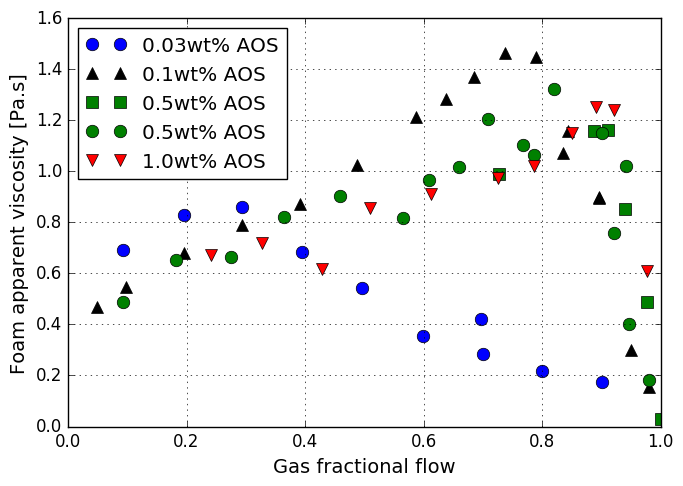

In [5]:
figure(figsize=(7,5))
marker_size=9
plot(AOS_low_fg, AOS_low[:muf_tot], "ob", markersize=marker_size)
plot(AOS_mid_fg, AOS_mid[:muf_tot], "^k", markersize=marker_size)
plot(AOS_high_fg, AOS_high[:muf_tot], "sg", markersize=marker_size)
plot(AOS_high2_fg, AOS_high2[:mu_foam], "og", markersize=marker_size)
plot(AOS_higher_fg, AOS_higher[:muf_tot], "vr", markersize=marker_size)
line_color=["b--", "k-", "g-", "g-", "r--"]
#for i in [1,2,4,5]
#    d=load(file_name[i]*".jld")
#    plot(d["fg"], d["muf"], line_color[i], linewidth=2)
#end
xlabel("Gas fractional flow", fontsize=14)
ylabel("Foam apparent viscosity [Pa.s]", fontsize=14)
legend(["0.03wt% AOS", "0.1wt% AOS", "0.5wt% AOS", "0.5wt% AOS", "1.0wt% AOS"], loc=2)
grid()
tight_layout()
savefig("foam_fit_all.eps")
savefig("foam_fit_all.png")

# Plot the amphosol results

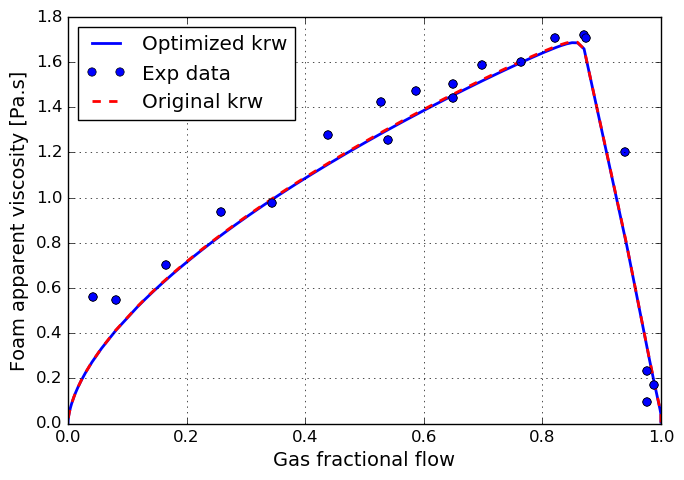

In [25]:
figure(figsize=(7,5))
line_color=["b-", "r--"]
for i=6:7
    d=load(file_name[i]*".jld")
    plot(d["fg"], d["muf"], line_color[i-5], linewidth=2, 
    d["fg_exp"], d["muf_exp"], "ob")
end
xlabel("Gas fractional flow", fontsize=14)
ylabel("Foam apparent viscosity [Pa.s]", fontsize=14)
legend(["Optimized krw", "Exp data", "Original krw"], loc=2)
grid()
tight_layout()
savefig("foam_fit_amph.eps")

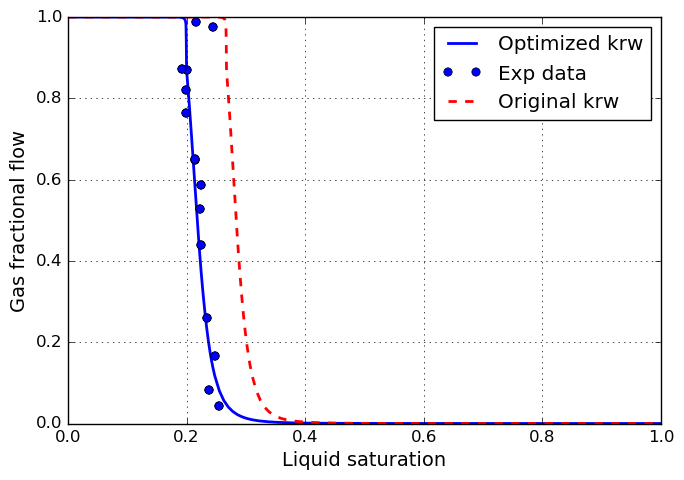

In [26]:
figure(figsize=(7,5))
for i=6:7
    d=load(file_name[i]*".jld")
    plot(d["sw"], d["fg"], line_color[i-5], linewidth=2,
    d["sw_exp"], d["fg_exp"], "ob")
end
ylabel("Gas fractional flow", fontsize=14)
xlabel("Liquid saturation", fontsize=14)
legend(["Optimized krw", "Exp data", "Original krw"], loc=1)
grid()
tight_layout()
savefig("foam_sat_amph_compare.eps")

1245

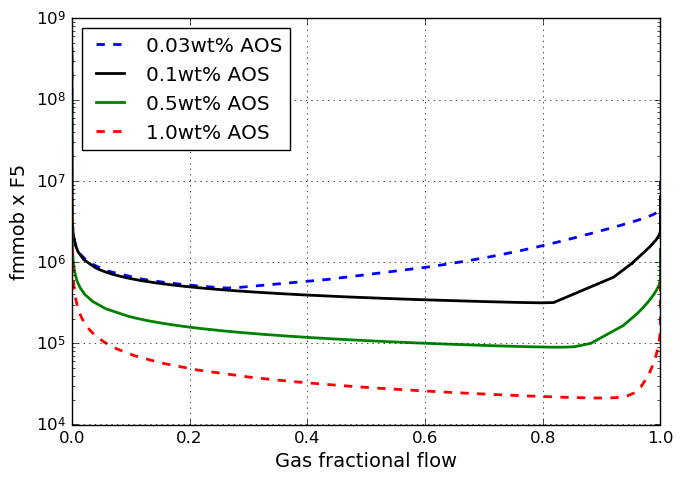

In [23]:
figure(figsize=(7,5))
s_gl=0.03 # N/m surface tension
line_color=["b--", "k-", "g-", "g-", "r--"]
for i in [1,2,4,5]
    print(i)
    d=load(file_name[i]*".jld")
    x=d["cmg_stars"]
    semilogy(d["fg"], x[1]*(x[4]./(mean(d["u"]).*d["muf"]/s_gl)), line_color[i], linewidth=2)
end
xlabel("Gas fractional flow", fontsize=14)
ylabel("fmmob x F5", fontsize=14)
legend(["0.03wt% AOS", "0.1wt% AOS", "0.5wt% AOS", "1.0wt% AOS"], loc=2)
grid()
tight_layout()
savefig("fmmob_F5.eps")

In [26]:
for i in [1,2,4,5]
    d=load(file_name[i]*".jld")
    x=d["cmg_stars"]
    println(x')
end

[2.469140689968581e6 22230.003484237513 0.25474693254618025 8.396666318556526e-5 1.9753087813587473]
[2.4074131152794426e6 7416.663182429161 0.207558832028589 8.15000034811014e-5 1.9259260653093646]
[615770.1292554896 1675.5508545006255 0.08798347210092207 7.652101898423342e-5 1.3333345877842822]
[135168.98557255964 736.2952519658818 0.06681795992363246 7.218151281139393e-5 0.6657525900753278]
